In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [163]:
X = np.loadtxt(open("R/X.csv", "rb"), delimiter=",", skiprows=1)
Y = np.loadtxt(open("R/Y.csv", "rb"), delimiter=",", skiprows=1)

with open('R/X.csv', 'r') as file:
    first_line = file.readline()
    col_names = first_line.split(',')

col_names

['n',
 'Postfloodingorirrigatedcroplandsoaquatic',
 'Rainfedcroplands',
 'Mosaiccropland5070vegetationgrasslandshrublandforest2050',
 'Mosaicvegetationgrasslandshrublandforest5070cropland2050',
 'Closedtoopen15broadleavedevergreenorsemideciduousforest5m',
 'Closed40broadleaveddeciduousforest5m',
 'Open1540broadleaveddeciduousforestwoodland5m',
 'Closed40needleleavedevergreenforest5m',
 'Open1540needleleaveddeciduousorevergreenforest5m',
 'Closedtoopen15mixedbroadleavedandneedleleavedforest5m',
 'Mosaicforestorshrubland5070grassland2050',
 'Mosaicgrassland5070forestorshrubland2050',
 'Closedtoopen15broadleavedorneedleleavedevergreenordeciduousshrubland5m',
 'Closedtoopen15herbaceousvegetationgrasslandsavannasorlichensmosses',
 'Sparse15vegetation',
 'Closedtoopen15broadleavedforestregularlyfloodedsemipermanentlyortemporarilyFreshorbrackishwater',
 'Closed40broadleavedforestorshrublandpermanentlyfloodedSalineorbrackishwater',
 'Closedtoopen15grasslandorwoodyvegetationonregularlyfloodedor

In [80]:
X.shape

(8210, 43)

In [81]:
Y.shape

(8210, 2)

In [110]:
reg = MLPRegressor(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(128, 48, 12), random_state=1)
reg.fit(X, Y)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(128, 48, 12), random_state=1)

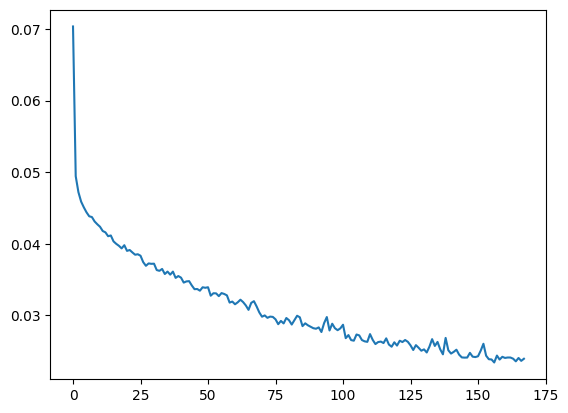

In [111]:
plt.plot(reg.loss_curve_)

In [112]:
Yhat = reg.predict(X)

In [156]:
X

array([[-0.39174301, -0.12305937, -0.41676181, ..., -0.51231071,
        -0.15637845,  0.78064979],
       [-0.29654944, -0.12305937, -0.41676181, ..., -0.51231071,
        -0.15637845,  0.78064979],
       [-0.32034783, -0.12305937, -0.41676181, ..., -0.51231071,
        -0.15637845,  0.78064979],
       ...,
       [-0.15375907, -0.12305937, -0.41676181, ...,  1.95170271,
        -0.15637845, -1.28082811],
       [-0.17755747, -0.12305937, -0.41676181, ...,  1.95170271,
        -0.15637845, -1.28082811],
       [-0.01096871, -0.12305937, -0.41676181, ...,  1.95170271,
        -0.15637845, -1.28082811]])

In [157]:
def permute_column(X, c):
    X_new = X.copy()
    np.random.shuffle(X_new[:, c])
    return X_new

In [179]:
scores = []
for i in range(X.shape[1]):
    X_i = permute_column(X, i)
    scores.append(reg.score(X_i, Y))

score_descrease = reg.score(X, Y) - scores

0 n
1 Postfloodingorirrigatedcroplandsoaquatic
2 Rainfedcroplands
3 Mosaiccropland5070vegetationgrasslandshrublandforest2050
4 Mosaicvegetationgrasslandshrublandforest5070cropland2050
5 Closedtoopen15broadleavedevergreenorsemideciduousforest5m
6 Closed40broadleaveddeciduousforest5m
7 Open1540broadleaveddeciduousforestwoodland5m
8 Closed40needleleavedevergreenforest5m
9 Open1540needleleaveddeciduousorevergreenforest5m
10 Closedtoopen15mixedbroadleavedandneedleleavedforest5m
11 Mosaicforestorshrubland5070grassland2050
12 Mosaicgrassland5070forestorshrubland2050
13 Closedtoopen15broadleavedorneedleleavedevergreenordeciduousshrubland5m
14 Closedtoopen15herbaceousvegetationgrasslandsavannasorlichensmosses
15 Sparse15vegetation
16 Closedtoopen15broadleavedforestregularlyfloodedsemipermanentlyortemporarilyFreshorbrackishwater
17 Closed40broadleavedforestorshrublandpermanentlyfloodedSalineorbrackishwater
18 Closedtoopen15grasslandorwoodyvegetationonregularlyfloodedorwaterloggedsoilFreshbrackis

In [169]:
[x for _, x in sorted(zip(-score_descrease, col_names))]

['max_lon',
 'elevation_mean',
 'min_lon',
 'abs_mid_lat',
 'elevation_sd',
 'abs_min_lat',
 'length',
 'max_lat',
 'min_lat',
 'Closed40needleleavedevergreenforest5m',
 'Mosaiccropland5070vegetationgrasslandshrublandforest2050',
 'Habit_aquatic',
 'Closedtoopen15broadleavedevergreenorsemideciduousforest5m',
 'abs_max_lat',
 'Metabolism_ectotherm',
 'Sparse15vegetation',
 'Habit_winged\n',
 'Habit_terrestrial',
 'Waterbodies',
 'Closed40broadleaveddeciduousforest5m',
 'Mosaicvegetationgrasslandshrublandforest5070cropland2050',
 'Rainfedcroplands',
 'Closedtoopen15mixedbroadleavedandneedleleavedforest5m',
 'n',
 'Metabolism_endotherm',
 'Mosaicgrassland5070forestorshrubland2050',
 'Closedtoopen15broadleavedorneedleleavedevergreenordeciduousshrubland5m',
 'Open1540needleleaveddeciduousorevergreenforest5m',
 'ArtificialsurfacesandassociatedareasUrbanareas50',
 'Closedtoopen15herbaceousvegetationgrasslandsavannasorlichensmosses',
 'Metabolism_photosynthesis',
 'area',
 'Mosaicforestorshrub

In [171]:
list(zip(score_descrease, col_names))

[(0.1742031586432028, 'n'),
 (0.04672352552973369, 'Postfloodingorirrigatedcroplandsoaquatic'),
 (0.183341568697514, 'Rainfedcroplands'),
 (0.23143595617032803,
  'Mosaiccropland5070vegetationgrasslandshrublandforest2050'),
 (0.18688551358044042,
  'Mosaicvegetationgrasslandshrublandforest5070cropland2050'),
 (0.22714912818677546,
  'Closedtoopen15broadleavedevergreenorsemideciduousforest5m'),
 (0.19214504326533077, 'Closed40broadleaveddeciduousforest5m'),
 (0.0475003424296937, 'Open1540broadleaveddeciduousforestwoodland5m'),
 (0.23190261163484, 'Closed40needleleavedevergreenforest5m'),
 (0.15510957831114386, 'Open1540needleleaveddeciduousorevergreenforest5m'),
 (0.17556533121039097,
  'Closedtoopen15mixedbroadleavedandneedleleavedforest5m'),
 (0.13105250441724442, 'Mosaicforestorshrubland5070grassland2050'),
 (0.16271670272878086, 'Mosaicgrassland5070forestorshrubland2050'),
 (0.15829732504863497,
  'Closedtoopen15broadleavedorneedleleavedevergreenordeciduousshrubland5m'),
 (0.1456480

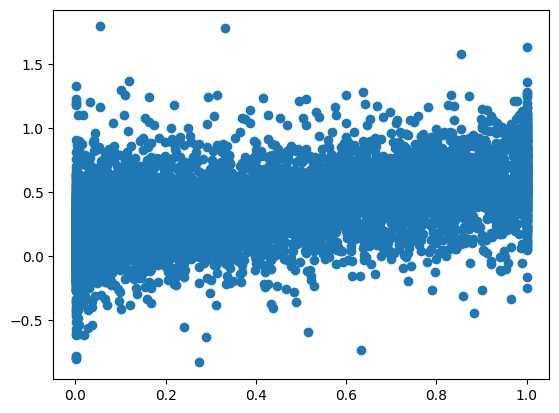

In [180]:
plt.plot(Y[:,0], reg.predict(permute_column(X, 27))[:,0], "o")